In [39]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
np.random.seed(42)
%matplotlib inline

## making dataset using make_blobs method sklearn package

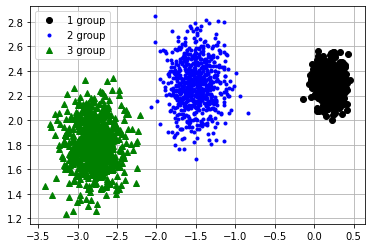

In [49]:
# making trainning dataset
centers = [
    [ 0.2,  2.3],
    [-1.5 ,  2.3],
    [-2.8,  1.8]
]

X, labels = make_blobs(n_samples=2001, centers=centers, cluster_std=[.1 , .2, .2])

def ploting_dataset(X, labels=None):
    colors = {
        1: 'ko',
        2: 'b.',
        3: 'g^',
    }
    if labels is not None:
        
        unique_labels = np.unique(labels)
        data_set = np.empty((X.shape[0], len(unique_labels) * X.shape[1]))
        data_set = np.c_[
                     X[labels==unique_labels[0]], 
                     X[labels==unique_labels[1]],
                     X[labels==unique_labels[2]]
                    ]
        for i in range(1, 4):
            plt.plot(data_set[:, i*2 - 2], data_set[:, i*2 - 1],
                 colors.get(i, 1), label= f'{i} group'
            )
    else:
        plt.plot(X[:, 0], X[:, 1], 'bo')

ploting_dataset(X, labels)
plt.grid(True)
plt.legend()
plt.show()

## helper functions for randomly select centroids

### `Attention` you can use kmeans++ algorithm for selecting centroids


In [9]:
def select_random_centroids(X, k):
    """ select k random instance from data_set
        
        params:
            k is number of initial centeroids
        
        returns:
             k random centroids     
     """

    centroids = []
    for i in range(k):
        center = np.random.randint(0, X.shape[0] - 1)
        centroids.append(X[center])
    
    return np.array(centroids)

k = 3

centroids = select_random_centroids(X, k)
centroids

array([[-2.67795677,  1.83139459],
       [-1.52418963,  2.38390649],
       [-3.05862831,  1.91447806]])

## implementing Kmeans Algoithm

In [10]:
n_epoch = 50

def point_to_centroid_and_update_centroids(X, mins_to_centroids, k, shape, itr):
    updated_centroids = np.empty(shape)
    data_sets_to_centroid = {}

    for i in range(k):
        data_sets_to_centroid[i + 1] = np.empty((1, 2))

    for i in range(X.shape[0]):
        data_sets_to_centroid[mins_to_centroids[i]] = \
            np.vstack([data_sets_to_centroid[mins_to_centroids[i]], X[i]])
 
    for i in range(k):
        print('{} cluster shape is:'.format(i + 1), data_sets_to_centroid[i + 1].shape) 
        # updating centroids
        updated_centroids[i, :] = np.mean(data_sets_to_centroid[i+1], axis=0)
    
    print(f'iteration: {itr+1}')
    print('*******' * 2)
    print(updated_centroids)
    return updated_centroids

def kmeans_algorightm(X=X, n_epoch=n_epoch, centroids=centroids, k=k):
    
    for i in range(n_epoch):
        # find distance for every pair of centroids
        distances = None
        for row in range(k):
            # suming on columns of distance
            distance = np.sum((X - centroids[row, :]) ** 2, axis=1)
            if row == 0:
                distances = distance.reshape((X.shape[0], 1))
            else:
                distances = np.hstack([distances, np.reshape(distance, (X.shape[0], 1))])
        
        mins_to_centroids = np.argmin(distances, axis=1) + 1
        print(mins_to_centroids)
        centroids = point_to_centroid_and_update_centroids(X, 
                                    mins_to_centroids, k, centroids.shape, i)
        print(centroids)
    return centroids

 
centroids = kmeans_algorightm(centroids=centroids)

centroids

[2 2 2 ... 2 1 2]
1 cluster shape is: (437, 2)
2 cluster shape is: (1336, 2)
3 cluster shape is: (231, 2)
iteration: 1
**************
[[-2.68492585  1.77788008]
 [-0.64847653  2.30840339]
 [-3.00705522  1.83088926]]
[[-2.68492585  1.77788008]
 [-0.64847653  2.30840339]
 [-3.00705522  1.83088926]]
[2 2 2 ... 2 1 2]
1 cluster shape is: (487, 2)
2 cluster shape is: (1250, 2)
3 cluster shape is: (267, 2)
iteration: 2
**************
[[-2.52201916  1.85645618]
 [-0.57001903  2.31436171]
 [-2.9786203   1.82126844]]
[[-2.52201916  1.85645618]
 [-0.57001903  2.31436171]
 [-2.9786203   1.82126844]]
[2 2 2 ... 2 1 1]
1 cluster shape is: (485, 2)
2 cluster shape is: (1128, 2)
3 cluster shape is: (391, 2)
iteration: 3
**************
[[-2.2320575   2.0092478 ]
 [-0.45032644  2.3181525 ]
 [-2.92965266  1.77481878]]
[[-2.2320575   2.0092478 ]
 [-0.45032644  2.3181525 ]
 [-2.92965266  1.77481878]]
[2 2 2 ... 1 3 1]
1 cluster shape is: (577, 2)
2 cluster shape is: (837, 2)
3 cluster shape is: (590, 2)
i

array([[-1.50551649,  2.31206108],
       [ 0.20401376,  2.3039588 ],
       [-2.79860127,  1.79530308]])

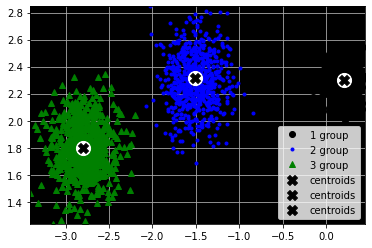

In [56]:
def plot_centroids(centroids=centroids):
    for row in range(centroids.shape[0]):
        plt.scatter(centroids[row, 0], centroids[row, 1], s=200, marker='o', zorder=10, color='w')
        plt.scatter(centroids[row, 0], centroids[row, 1],
            s=100, marker='X', zorder=11, color='k', label='centroids')

def plot_taretories(X, centroids, k):
    mins = np.min(X, axis=0)
    maxs = np.max(X, axis=0)
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), np.linspace(mins[1], maxs[1], 1000))
    x_new = np.c_[xx.ravel(), yy.ravel()]
    
    distances = np.array([]).reshape(x_new.shape[0], 0)
    for i in range(k):
        distances = np.c_[distances ,(np.sum((x_new - centroids[i, :]) ** 2, axis=1))]
    
    mins_arg = np.argmin(distances, axis=1)
    plt.contourf(mins_arg.reshape(xx.shape),
                extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap='Pastel2')
    plt.contour(mins_arg.reshape(xx.shape),
                extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1,
                colors='k')


ploting_dataset(X, labels)
plot_centroids()
plot_taretories(X, centroids, k)
plt.grid(True)
plt.legend()
plt.show()
